# Market Segmentation

In [21]:
#importing the modules
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

### Initial Data Processing and Feature Engineering 

In [22]:
df = pd.read_csv("social_marketing.csv")
df = df.drop(columns='Unnamed: 0')

#engineer a total posts column 
df['total_posts'] = df.sum(axis=1)

### Creating Clusters to Indentify Potential Bots using K-Means

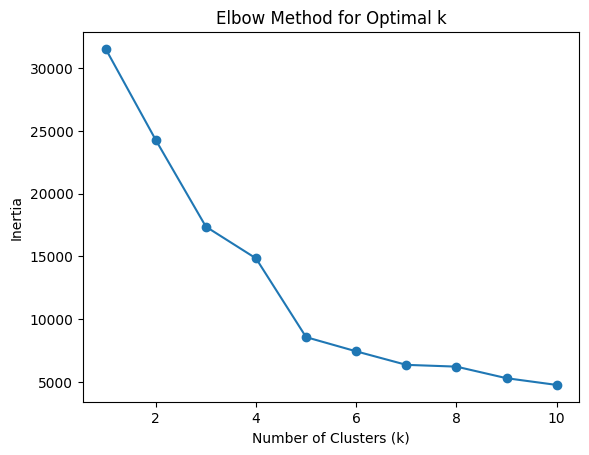

In [23]:
#features that help determine whether user is a bot
features = df[['total_posts', 'chatter', 'spam', 'adult']]

#scale those features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

#creating an elbow plot
SSE = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    SSE.append(kmeans.inertia_)

plt.plot(k_range, SSE, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


#### Implementing K-Means Model and Analyzing Clusters 

In [24]:
#based on the elbow plot above, chose 5 for K
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features)

for cluster_num in range(k):
    cluster_data = df[df['cluster'] == cluster_num]
    print(f"Cluster {cluster_num} Statistics:")
    print(cluster_data[['total_posts', 'chatter', 'spam', 'adult']].describe())

Cluster 0 Statistics:
       total_posts      chatter    spam        adult
count  4337.000000  4337.000000  4337.0  4337.000000
mean     26.627162     2.861194     0.0     0.079087
std       9.804196     1.870239     0.0     0.465575
min       3.000000     0.000000     0.0     0.000000
25%      19.000000     1.000000     0.0     0.000000
50%      26.000000     3.000000     0.0     0.000000
75%      35.000000     4.000000     0.0     0.000000
max      47.000000     9.000000     0.0     4.000000
Cluster 1 Statistics:
       total_posts     chatter    spam        adult
count  1813.000000  1813.00000  1813.0  1813.000000
mean     63.929950     3.42802     0.0     0.102041
std      17.363725     1.84646     0.0     0.551999
min      44.000000     0.00000     0.0     0.000000
25%      51.000000     2.00000     0.0     0.000000
50%      59.000000     3.00000     0.0     0.000000
75%      71.000000     5.00000     0.0     0.000000
max     158.000000     9.00000     0.0     4.000000
Cluster 2 S

#### Identified Potential Bots

In [25]:
df[df['cluster']==4].describe()[['adult','chatter','spam','total_posts']]

,adult,chatter,spam,total_posts
count,49.000000,49.000000,49.000000,49.000000
mean,7.204082,4.653061,1.040816,53.775510
std,5.255868,3.694314,0.199915,22.860323
min,0.000000,0.000000,1.000000,14.000000
25%,3.000000,2.000000,1.000000,41.000000
50%,6.000000,4.000000,1.000000,49.000000
75%,10.000000,6.000000,1.000000,64.000000
max,18.000000,20.000000,2.000000,111.000000


#### Removing Potential Bots from Further Analysis

In [26]:
#based on the elbow plot above, decided to remove cluster 4. 
df_wout_bots = df[df['cluster'] != 4]
df_wout_bots

,chatter,current_events,travel,photo_sharing,uncategorized,tv_film,sports_fandom,politics,food,family,...,parenting,dating,school,personal_fitness,fashion,small_business,spam,adult,total_posts,cluster
0,2,0,2,2,2,1,1,0,4,1,...,1,1,0,11,0,0,0,0,61,1
1,3,3,2,1,1,1,4,1,2,2,...,0,1,4,0,0,0,0,0,30,0
2,6,3,4,3,1,5,0,2,1,1,...,0,1,0,0,1,0,0,0,47,1
3,1,5,2,2,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,21,0
4,5,2,0,6,1,0,0,2,0,1,...,0,0,0,0,0,1,0,0,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7876,0,1,1,1,0,7,7,0,3,3,...,3,0,2,0,1,2,0,0,57,1
7877,5,4,2,1,0,1,0,1,0,0,...,0,0,0,2,0,0,0,0,18,0
7878,9,3,2,4,0,1,0,4,1,3,...,0,1,0,5,0,1,0,0,58,3
7879,3,2,1,1,0,4,1,2,1,0,...,1,1,0,6,1,0,0,0,49,1


### Find Top 15 Categories to analyze Market Clusters

In [27]:
#get the normalized sums per category
column_sums = df_wout_bots.sum()
total_posts = df_wout_bots['total_posts'].sum()
normalized_sums = column_sums / total_posts

#get the top 15 variables
top_15_vars = normalized_sums.sort_values(ascending=False)[1:16].index
df_top_15 = df_wout_bots[top_15_vars]

#scale the features again
scaler = StandardScaler()
scaled_features2 = scaler.fit_transform(df_top_15)

### Creating Clusters to Indentify Potential Bots using K-Means

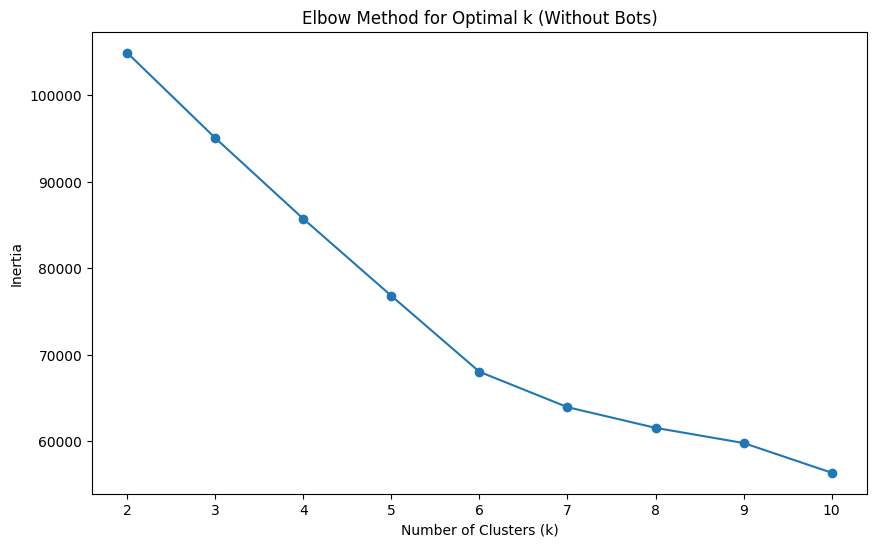

In [28]:
#elbow plot 
SSE_2 = []
k_range = range(2, 11)  
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features2)
    SSE_2.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, SSE_2, marker='o')
plt.title('Elbow Method for Optimal k (Without Bots)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()



#### Implementing K-Means Model and Analyzing Clusters to identify Market Segments

In [29]:
#choosing K as 6 based on plot
k = 6
kmeans = KMeans(n_clusters=k, random_state=42)
df_top_15['segment_cluster'] = kmeans.fit_predict(scaled_features2)

for cluster_num in range(k):
    cluster_data = df_top_15[df_top_15['segment_cluster'] == cluster_num]
    print(f"\nSegment Cluster {cluster_num} Statistics:")
    print(cluster_data.mean())
    print(cluster_data.count())
#will analyze the cluster outputs to determine market segments


Segment Cluster 0 Statistics:
chatter              3.839002
photo_sharing        2.526077
health_nutrition    12.256236
cooking              4.056689
politics             1.235828
sports_fandom        1.197279
travel               1.230159
college_uni          0.950113
current_events       1.513605
personal_fitness     6.575964
food                 2.122449
shopping             1.244898
online_gaming        0.843537
news                 1.168934
religion             0.801587
segment_cluster      0.000000
dtype: float64
chatter             882
photo_sharing       882
health_nutrition    882
cooking             882
politics            882
sports_fandom       882
travel              882
college_uni         882
current_events      882
personal_fitness    882
food                882
shopping            882
online_gaming       882
news                882
religion            882
segment_cluster     882
dtype: int64

Segment Cluster 1 Statistics:
chatter              4.062053
photo_sharing   

C:\Users\felip\AppData\Local\Temp\ipykernel_14816\4111677638.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_15['segment_cluster'] = kmeans.fit_predict(scaled_features2)


### Principal Components Analysis

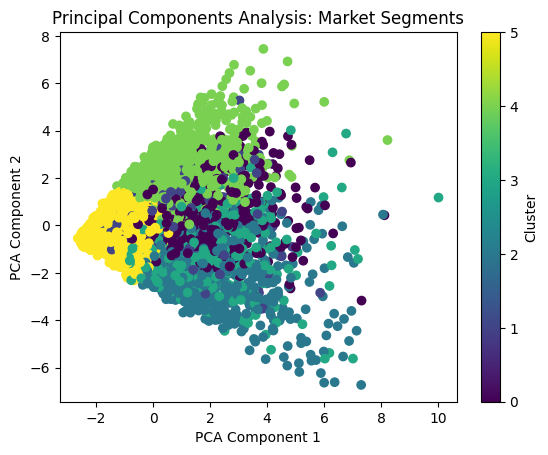

In [39]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_features2)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=df_top_15['segment_cluster'], cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Principal Components Analysis: Market Segments')
plt.colorbar(label='Cluster')
plt.show()

## Data Processing Outline/Summary

The analysis of NutrientH20s twitter follower data began with creating an attribute called "total_posts", which sums up the total of all the characteristics a twitter user has posted about. Although a post may be classified in more than one category, it seemed pretty important to get the total number of posts to determine a user's online activity. The thought behind this is that a bot is likely to have a high "total_posts" value, because bot frequency tends to exceed human frequency. Four features were then used to determine whether a user was likely a bot: chatter, adult, spam, total_posts. Bots tend to post tweets high in sexual and spam like content, so these features seemed like an ideal target. K-Means was used to cluster the data based on these features and one group of users was identified as having high adult and spam content. Those users were removed from the analysis. 

The data originally contained 39 characteristics used to analyze twitter posts. This was far too many to include in the analysis, so the decision was made to trim down the data to the top 15 variables. This was done by normalizing the variables and selecting the variables with the highest number of posts. Once the dimension of the data set was reduced, K-Means was used once more to cluster the data into different segments. This final cluster was used to identify the different market segments in the following report. 



## NutrientH20 Marketing Summary

There were six primary market segments found in Nutrient H20's social media followers: the Health/Personal Fitness Conscious group, the college gaming enthusiasts, the sports and religion group, the politically active travelers, the social and shopping enthusiasts, and the low engagement audience. 

There is an ample opportunity to promote NutrientH20 in the Health/Personal Fitness group. NutrientH20 can focus on promoting health related content, fitness challenges, and wellness incentives. Targeting this group of people would be a priority, as this market segment makes up the third highest segment in social media following. Additionally, the product's nutritional value aligns with the interests of the members of this market segment.

There is a big social media following of college gamers. Their interests mainly lie in gaming, so promoting the Nutrient H20 drink as an energy-boosting drink for college gamers could provide some valuable return. Nutrient H20 should look at teaming up with college esports teams to promote their product. 

The sports/religion group provides a good opportunity to spread the NutrientH20 brand. Teaming up with local sports teams and sponsoring church events could increase NutrientH20's popularity with this demographic. Word of mouth travels really fast around sports and church communities; combining these communities with the online following would lead to exponential brand growth.

The politically aware travelers provide a unique opportunity to spread the popularity of the NutrientH20 product. NutrientH20 could market their product to these customers by promoting their drink as a great "on the go" beverage that will boost their energy. NutrientH20 could position itself as being an active, inclusive, and global brand. 

The second largest market segment is the social and shopping enthusiasts. This market segment tends to spend its time tweeting about shopping and sharing lots of photos, so they provide a great opportunity for online brand exposure. This group can be targeted by tweeting visually appealing content and creating promotional offers to drive brand visibility. (ie. "Whoever can post the coolest picture with NutrinetH20 wins supply for a year.")

The last group represents the low-engagement audience. These users tend to be more passive, usually scrolling rather than engaging. However, since they follow the brand, it's reasonable to assume that health and wellness still resonate with them. To reach this audience, NutrientH2O could create online content that encourages interaction, with the overarching goal of promoting the product’s health benefits.
